In [45]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
import datetime 
from datetime import date, timedelta
from sklearn.preprocessing import scale
import seaborn as sn



# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen

import yfinance as yf



In [25]:
data=pd.read_pickle("ClosingPrices10Years")
data.to_csv(r'data.csv')
data

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,24.83500,nan,18.07000,56.99000,11.92500,34.12500,nan,61.01500,12.74500,23.33500,...,145.87000,nan,nan,34.67500,nan,39.17500,42.84500,nan,22.96500,nan
2011-06-02,24.51500,nan,17.79500,56.80500,11.94500,34.22500,nan,60.47500,12.54500,23.31500,...,146.21000,nan,26.46500,34.82500,nan,39.19500,42.60000,66.32500,23.04500,nan
2011-06-03,24.44000,nan,17.29000,55.83500,11.84500,33.27500,nan,59.78500,12.45500,23.24000,...,143.41500,nan,26.33000,33.73500,nan,39.13500,41.61500,65.79500,22.88500,nan
2011-06-06,24.42000,nan,16.87000,55.76500,11.69500,32.84500,nan,58.87500,12.28500,22.78500,...,141.30500,nan,25.70000,33.76500,nan,38.75000,41.10000,65.13500,22.17500,nan
2011-06-07,24.60000,nan,17.11500,56.27500,11.57500,33.00500,nan,58.41500,12.31500,22.73500,...,136.09500,nan,25.30500,34.19500,nan,38.95500,41.25000,64.50500,21.78500,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,117.31000,115.91000,279.76000,284.84500,96.50500,497.71500,77.43500,190.67000,25.69500,56.36000,...,129.44500,71.67000,23.89500,123.79000,115.88000,120.54500,501.66500,167.77500,57.52000,176.39500
2021-05-25,118.42500,114.55500,284.00500,286.01500,96.59500,505.11500,77.86500,188.02000,25.34500,55.76500,...,129.00500,71.24500,23.39500,124.10500,116.75500,120.62500,501.87000,167.74500,56.02500,176.60500
2021-05-26,116.75500,114.70500,282.13500,284.03500,97.31500,507.02000,78.34500,189.00500,25.47500,56.26500,...,132.42500,70.99500,23.73500,123.71000,116.85500,120.50500,501.45500,164.24000,56.71500,175.32000


In [26]:
#Calculating the returns from prices
data=data.pct_change()
#data=data.reset_index()

data=data.fillna(0)
data

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2011-06-02,-0.01289,0.00000,-0.01522,-0.00325,0.00168,0.00293,0.00000,-0.00885,-0.01569,-0.00086,...,0.00233,0.00000,0.00000,0.00433,0.00000,0.00051,-0.00572,0.00000,0.00348,0.00000
2011-06-03,-0.00306,0.00000,-0.02838,-0.01708,-0.00837,-0.02776,0.00000,-0.01141,-0.00717,-0.00322,...,-0.01912,0.00000,-0.00510,-0.03130,0.00000,-0.00153,-0.02312,-0.00799,-0.00694,0.00000
2011-06-06,-0.00082,0.00000,-0.02429,-0.00125,-0.01266,-0.01292,0.00000,-0.01522,-0.01365,-0.01958,...,-0.01471,0.00000,-0.02393,0.00089,0.00000,-0.00984,-0.01238,-0.01003,-0.03102,0.00000
2011-06-07,0.00737,0.00000,0.01452,0.00915,-0.01026,0.00487,0.00000,-0.00781,0.00244,-0.00219,...,-0.03687,0.00000,-0.01537,0.01274,0.00000,0.00529,0.00365,-0.00967,-0.01759,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,0.00149,-0.00189,-0.00007,0.00482,0.01185,0.01965,0.00337,-0.02175,0.01301,0.00652,...,0.01645,-0.00534,0.00674,0.00773,0.00342,0.00685,0.01454,0.00281,-0.00981,0.00210
2021-05-25,0.00950,-0.01169,0.01517,0.00411,0.00093,0.01487,0.00555,-0.01390,-0.01362,-0.01056,...,-0.00340,-0.00593,-0.02092,0.00254,0.00755,0.00066,0.00041,-0.00018,-0.02599,0.00119
2021-05-26,-0.01410,0.00131,-0.00658,-0.00692,0.00745,0.00377,0.00616,0.00524,0.00513,0.00897,...,0.02651,-0.00351,0.01453,-0.00318,0.00086,-0.00099,-0.00083,-0.02089,0.01232,-0.00728


In [27]:
data.isnull().values.any()
count = np.isinf(data).values.sum()
count

0

In [28]:
data_exm=data.iloc[:500,:2]


In [29]:
maxlag=1
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data, variables = data.columns)        

KeyboardInterrupt: 

In [431]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

"""
    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 
        
"""

'\n    # Print Summary\n    print(f\'    Augmented Dickey-Fuller Test on "{name}"\', "\n   ", \'-\'*47)\n    print(f\' Null Hypothesis: Data has unit root. Non-Stationary.\')\n    print(f\' Significance Level    = {signif}\')\n    print(f\' Test Statistic        = {output["test_statistic"]}\')\n    print(f\' No. Lags Chosen       = {output["n_lags"]}\')\n\n    for key,val in r[4].items():\n        print(f\' Critical value {adjust(key)} = {round(val, 3)}\')\n\n    if p_value <= signif:\n        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")\n        print(f" => Series is Stationary.")\n    else:\n        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")\n        print(f" => Series is Non-Stationary.") \n        \n'

In [ ]:
# ADF Test on each column
for name, column in data.iteritems():
    adfuller_test(column, name=column.name)
    #print('\n')

In [ ]:
df_differenced = data.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    #print('\n')


In [426]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [ ]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    #print('\n')

In [ ]:
"""
model = VAR(data)
x = model.select_order(maxlags=1)
x.summary()
"""

In [466]:
"""
#Scaling the features of the data_year

x_year = data_year.values
x_year = StandardScaler().fit_transform(x_year)
#Performing PCA on 1 year data 

pca_year = PCA(n_components=10) #identifying N of components that retain 85% of the data (59 out of 496)
PC_year = pca_year.fit_transform(x_year)


#Scaling the features of the data_20days

x_20days = data_20days.values
x_20days = StandardScaler().fit_transform(x_20days)
#Performing PCA on 1 year data 

pca_20days = PCA(n_components=10) #identifying N of components that retain 85% of the data (59 out of 496)
PC_20days = pca_20days.fit_transform(x_20days)

print(len(PC_year[0]),len(PC_20days[0]))
"""



10 10


In [475]:
"""
print((pca_year.explained_variance_ratio_))


#Sorting the values of the first principal component by how large each one is
df = pd.DataFrame({'PCA':pca_year.components_[0], 'Variable Names':list(pca_year.columns)})
df = df.sort_values('PCA', ascending=False)

#Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
#print(df2['Variable Names'][0:11])

df.head()
"""

[0.56553921 0.024499   0.01649766 0.01288351 0.01234058 0.01090781
 0.01044252 0.00944005 0.00885822 0.00830335 0.00788105]


AttributeError: 'PCA' object has no attribute 'columns'

In [ ]:
"""
#Sorting the values of the first principal component by how large each one is

df = pd.DataFrame({'PCA':pca_year.components_[0], 'Variable Names':list(data_year.iloc[:,:0])})
df = df.sort_values('PCA', ascending=False)

#Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
print(df2['Variable Names'][0:11])
df

"""

In [378]:
"""
loadings = pca_year.components_.T * np.sqrt(pca_year.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6',
                                                 'PC7','PC8','PC9','PC10' ], index=data_year.columns)


#pd.set_option('display.float_format', lambda x: '%.5f' % x)


loading_matrix
"""

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
ABT,-0.73424,0.24880,-0.11662,-0.25818,0.00328,0.01232,-0.11901,-0.05402,-0.03409,0.04835
ABBV,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000
ABMD,-0.65771,-0.04029,0.00745,-0.06230,0.11207,-0.10373,-0.07228,0.07895,0.10767,0.02067
ACN,-0.80168,-0.11583,-0.08957,-0.12329,0.08942,-0.09616,0.03758,0.00287,0.11347,0.07253
ATVI,-0.59067,-0.12411,-0.10349,-0.12130,-0.01322,-0.04190,0.02264,-0.03498,-0.12542,-0.10082
...,...,...,...,...,...,...,...,...,...,...
YUM,-0.72176,-0.00287,-0.28771,0.07391,-0.15344,0.01552,-0.00992,-0.08052,-0.03432,0.14683
ZBRA,-0.83403,-0.03801,0.00922,-0.02927,0.09297,-0.10343,0.00054,0.06150,0.07228,-0.07888
ZBH,-0.78949,0.04391,-0.01458,-0.22522,-0.00062,0.03583,-0.15277,0.07775,-0.10829,0.03881
ZION,-0.81595,-0.05731,0.27033,-0.02598,-0.10753,0.04002,0.07941,-0.09979,-0.09485,0.05007


In [30]:
#Slecting Start and end date
start_date=datetime.date(2012,6,1) 
end_date = start_date + timedelta(days=60)  
 
data_year=data[data.index<start_date] # Isolating the data for one year (06/01/2011 - 06/01/2012)
data_42days = data[start_date:end_date] # Isolating the data for 20 days since 06/01/2012

In [31]:
#Scaling the features of the data
scaler=StandardScaler()
scaler.fit(data_year)
data_scaled_year = scaler.transform(data_year)

#Performing PCA on 1 year data
pca_year=PCA(n_components=11)
pca_year.fit(data_scaled_year)

len(pca_year.components_[0])

496

In [32]:

#Choosing the minimum number of principal components such that 95% of the variance is retained
pca_year = PCA(n_components=23)

pca_year.fit(data_year.fillna(0))

print(pca_year.n_components_) #114 components retain 95% of the data

pca_42days = PCA(.90)

pca_42days.fit(data_42days.fillna(0))


print(len(pca_year.components_), len(pca_42days.components_))




23
23 23


Text(0.5, 1.0, 'Variance explained by PCA components for 1 year data')

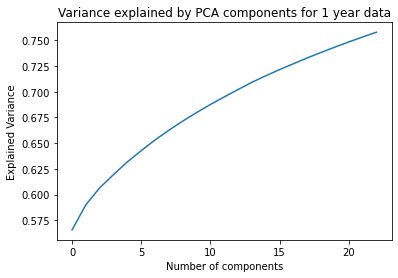

In [33]:
#print((pca.explained_variance_ratio_*100))
plt.plot(np.cumsum(pca_year.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.title("Variance explained by PCA components for 1 year data")

Text(0.5, 1.0, 'Variance explained by PCA components for 42 days ahead data')

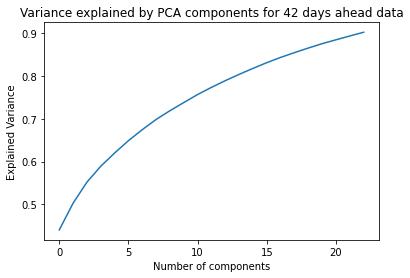

In [34]:
#print((pca.explained_variance_ratio_*100))
plt.plot(np.cumsum(pca_42days.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.title("Variance explained by PCA components for 42 days ahead data")

In [35]:
prices = yf.download(['SPY'], start='2011-06-01', end='2012-06-01')['Adj Close'] 

[*********************100%***********************]  1 of 1 completed


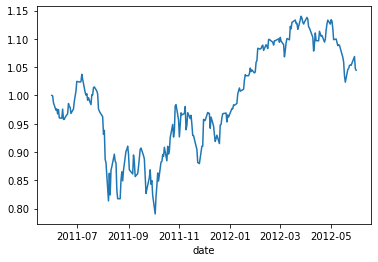

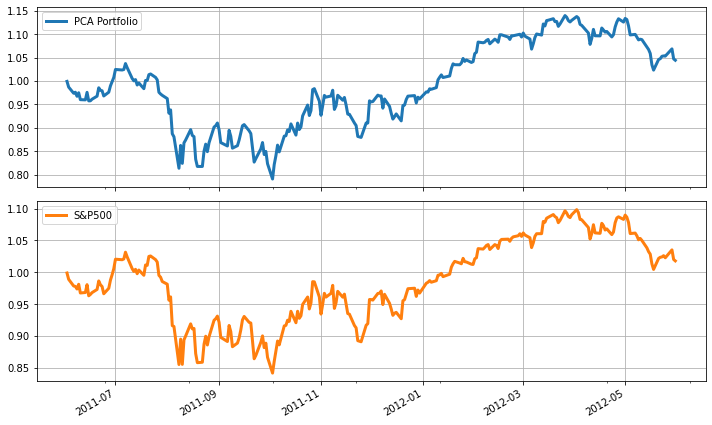

In [36]:
#formulating a portfolio of stocks by allocating the cash proportionally to the 
#1st principal component (i.e. linear combination of the input data), thus replicating the 
#returns of the S&P500 approximately


pc1=pca_year.components_[0]

weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*data_year).sum(1)
myrs.cumsum().apply(np.exp).plot()



rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
plt.savefig('tmp.png')


In [37]:
column_names=[]

for i in range(len(pca_year.components_)):
    column_names.append(i+1)
    
len(column_names)

23

In [38]:
#The correlations between indices and PCs closely related to PC coefficients imply the contribution of
#each index to each PC.

loadings = pca_year.components_.T * np.sqrt(pca_year.explained_variance_)


loading_matrix = pd.DataFrame(loadings, columns=[column_names], index=data_year.columns)


pd.set_option('display.float_format', lambda x: '%.5f' % x)


loading_matrix


,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
ABT,-0.00748,0.00157,0.00232,-0.00131,0.00205,-0.00083,-0.00080,0.00095,-0.00132,0.00068,...,0.00019,-0.00035,-0.00033,0.00025,0.00005,-0.00002,0.00010,0.00015,-0.00034,0.00095
ABBV,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,...,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000
ABMD,-0.02435,-0.00070,0.00160,-0.00253,0.00125,0.00607,-0.00572,0.00160,-0.00709,-0.00045,...,-0.00137,-0.00633,0.01006,0.00223,0.00244,-0.00017,-0.00486,0.00647,-0.00361,0.00242
ACN,-0.01544,-0.00220,-0.00042,-0.00312,0.00327,0.00135,-0.00092,-0.00058,-0.00023,0.00145,...,-0.00059,-0.00142,-0.00095,0.00002,-0.00058,0.00001,-0.00005,-0.00095,0.00166,-0.00010
ATVI,-0.00902,-0.00193,-0.00017,0.00073,0.00164,-0.00068,0.00007,0.00112,0.00017,0.00070,...,-0.00126,-0.00061,-0.00101,0.00133,0.00049,-0.00101,0.00049,0.00090,0.00013,-0.00013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,-0.01123,-0.00201,0.00405,0.00060,0.00149,-0.00196,0.00114,-0.00162,0.00056,0.00033,...,-0.00087,0.00049,0.00018,-0.00117,0.00048,-0.00177,0.00197,-0.00065,-0.00008,0.00000
ZBRA,-0.01755,-0.00084,0.00014,-0.00062,0.00014,0.00002,-0.00226,0.00065,-0.00202,-0.00115,...,-0.00087,-0.00146,-0.00054,0.00004,-0.00048,-0.00017,-0.00093,-0.00078,0.00124,0.00054
ZBH,-0.01345,0.00094,0.00098,-0.00015,0.00136,-0.00022,0.00090,0.00097,-0.00341,0.00290,...,0.00002,-0.00067,-0.00085,-0.00183,0.00099,-0.00031,0.00062,-0.00152,-0.00109,0.00063
ZION,-0.02465,0.00551,-0.00550,0.00352,-0.00115,-0.00197,0.00131,-0.00203,0.00132,0.00097,...,-0.00072,0.00122,-0.00071,-0.00039,0.00004,-0.00138,0.00128,-0.00040,-0.00310,-0.00243


In [39]:
loadings_42days = pca_42days.components_.T * np.sqrt(pca_42days.explained_variance_)

loading_matrix_42days = pd.DataFrame(loadings_42days, columns=[column_names], index=data_42days.columns)


pd.set_option('display.float_format', lambda x: '%.5f' % x)


loading_matrix_42days



,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
ABT,-0.00700,-0.00059,-0.00150,-0.00013,-0.00006,-0.00254,0.00081,-0.00137,-0.00009,-0.00049,...,0.00052,-0.00143,-0.00060,0.00114,0.00106,-0.00056,-0.00041,-0.00060,-0.00082,0.00034
ABBV,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,...,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000
ABMD,-0.01851,-0.00269,-0.00384,-0.00046,-0.00095,-0.00492,0.00057,-0.00041,0.00168,0.00026,...,0.00134,0.00524,0.00776,-0.00201,0.00402,-0.00068,-0.00307,0.00460,0.00082,0.00246
ACN,-0.01598,0.00109,0.00232,0.00074,0.00086,-0.00207,0.00341,0.00117,0.00070,-0.00080,...,0.00146,0.00093,0.00155,-0.00303,0.00131,0.00099,-0.00058,0.00046,0.00134,0.00062
ATVI,-0.01242,-0.00190,0.00407,0.00358,-0.00026,-0.00147,-0.00287,0.00423,-0.00363,0.00201,...,0.00224,-0.00272,0.00142,0.00346,-0.00001,0.00157,-0.00051,0.00113,0.00136,0.00168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,-0.01452,0.00085,-0.00060,-0.00183,-0.00553,0.00103,0.00128,0.00021,0.00349,0.00106,...,-0.00049,-0.00148,-0.00213,-0.00030,-0.00012,0.00018,-0.00414,-0.00107,0.00021,0.00539
ZBRA,-0.01032,-0.00068,0.00539,0.00166,-0.00159,-0.00235,0.00062,-0.00008,0.00081,-0.00330,...,0.00157,-0.00006,-0.00141,0.00109,0.00130,0.00367,-0.00011,-0.00079,-0.00149,0.00266
ZBH,-0.00967,-0.00772,0.00025,0.00214,-0.00105,-0.00396,-0.00054,0.00026,0.00071,-0.00013,...,0.00061,0.00088,0.00054,0.00121,0.00208,-0.00219,-0.00041,-0.00059,0.00041,-0.00258
ZION,-0.01721,-0.00235,-0.00498,0.00248,0.00074,-0.00158,-0.00087,0.00058,0.00028,0.00118,...,0.00048,0.00022,-0.00233,0.00426,-0.00025,-0.00026,0.00135,0.00104,-0.00131,-0.00172


In [40]:
#The percentage change in the correlation from 1 year data to 20 days data

subtractionResults = ((loading_matrix_42days - loading_matrix)/loading_matrix)*100
subtractionResults


,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
ABT,-6.44978,-137.62906,-164.75587,-90.31237,-102.68428,206.82425,-200.19939,-243.65353,-93.03383,-171.20162,...,166.13731,310.27852,83.60360,353.71233,1995.39120,2165.69201,-502.88741,-500.62025,143.68864,-64.42373
ABBV,-40.13632,7.53254,-578.63740,8204.66698,-1625.07493,-298.99872,-401.85563,-404.98082,-309.76139,290.79506,...,-638.35137,-7094.86994,2787.05470,553.14820,-837.89169,126.35247,-203.80194,-15.98579,-483.15233,2014.36008
ABMD,-23.99332,283.42023,-340.13921,-81.68917,-175.82725,-180.97125,-110.04300,-125.46569,-123.77004,-157.89940,...,-197.35203,-182.79202,-22.83005,-190.01689,64.75867,310.92441,-36.94617,-28.82003,-122.61009,1.72835
ACN,3.52621,-149.68956,-650.92894,-123.68170,-73.61410,-253.27244,-471.83150,-301.20774,-400.36921,-155.60199,...,-345.84357,-165.21853,-262.77912,-14317.60104,-325.31892,6808.27905,1112.99582,-148.09042,-19.07686,-724.99416
ATVI,37.69654,-1.71291,-2544.20155,392.71880,-115.79282,116.37250,-4172.51409,278.29758,-2230.56205,186.49724,...,-278.47167,343.65021,-240.21799,159.69233,-101.93398,-256.23265,-204.27880,25.77028,957.23733,-1389.67925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,29.29635,-142.23053,-114.84801,-405.36605,-471.37730,-152.71498,12.64089,-113.13134,527.56522,219.11874,...,-44.30667,-402.81988,-1276.03834,-74.23832,-124.86221,-109.95120,-310.40797,64.00063,-363.70964,115291.24270
ZBRA,-41.18097,-19.73657,3713.27624,-369.02277,-1227.34998,-11792.32923,-127.56204,-112.41451,-140.27888,185.32010,...,-280.89028,-95.72655,160.96118,2830.98215,-372.28628,-2274.12647,-88.28386,0.99686,-219.70452,392.75226
ZBH,-28.09005,-918.51127,-74.32644,-1478.39054,-177.03267,1662.99575,-160.63397,-73.75922,-120.88587,-104.38955,...,2497.90094,-232.53359,-163.73393,-166.21444,110.47893,596.80218,-165.93445,-61.07304,-137.90703,-506.63784
ZION,-30.16813,-142.73630,-9.34162,-29.39965,-164.05363,-19.69912,-166.38361,-128.30829,-78.59586,20.97074,...,-166.12771,-81.69866,225.85917,-1192.05809,-705.76887,-81.35002,5.96032,-362.44318,-57.57459,-29.21934


In [70]:
#Correlation matrix values for the whole dataset
corrMatrix = data.corr()
print (corrMatrix)

         ABT    ABBV    ABMD     ACN    ATVI    ADBE     AMD     AAP     AES  \
ABT  1.00000 0.44326 0.35336 0.53676 0.36268 0.48255 0.28297 0.31998 0.33735   
ABBV 0.44326 1.00000 0.20194 0.34176 0.23969 0.32742 0.19132 0.24263 0.24779   
ABMD 0.35336 0.20194 1.00000 0.30047 0.23419 0.32466 0.16049 0.15848 0.19710   
ACN  0.53676 0.34176 0.30047 1.00000 0.38514 0.57428 0.25588 0.34797 0.47417   
ATVI 0.36268 0.23969 0.23419 0.38514 1.00000 0.49735 0.26193 0.21152 0.22858   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
YUM  0.39074 0.25428 0.22574 0.47630 0.24085 0.39729 0.19146 0.35994 0.38953   
ZBRA 0.40140 0.27509 0.26981 0.46309 0.29523 0.43180 0.28644 0.28989 0.36076   
ZBH  0.48182 0.35319 0.27347 0.50982 0.24553 0.38715 0.20747 0.31965 0.43917   
ZION 0.33900 0.25199 0.23704 0.47731 0.17823 0.31326 0.16126 0.35550 0.42891   
ZTS  0.51055 0.41904 0.23955 0.45275 0.30438 0.41744 0.27395 0.28400 0.29772   

         AFL  ...    WYNN     XEL     X

<AxesSubplot:>

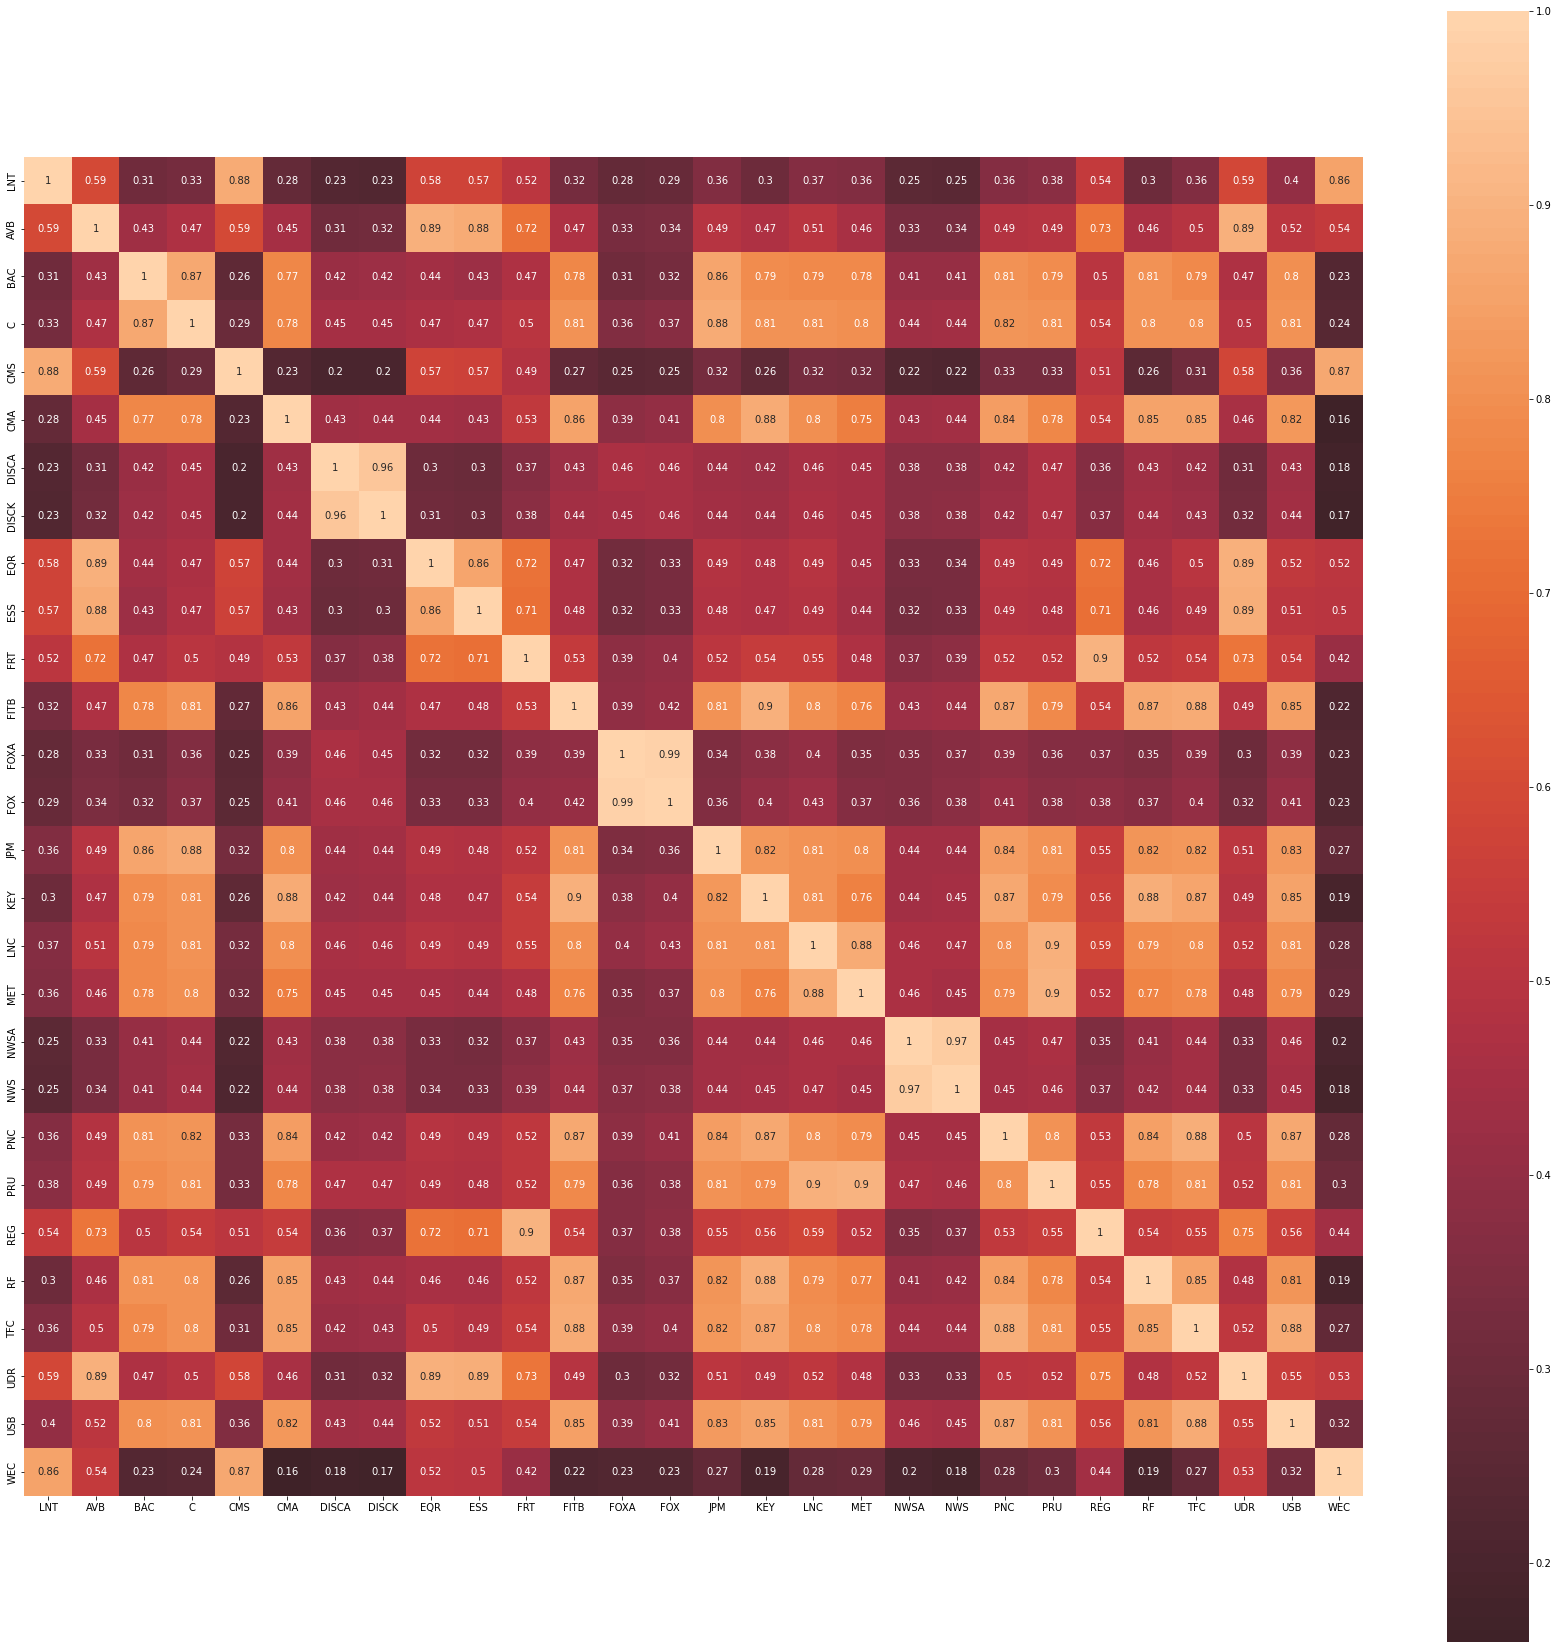

In [95]:
#Correlation matrix with heatmap for values with correlation higher than 0.87
plt.figure(figsize=(30,30))
high_corr_columns=data.columns[list(data.corr().apply( lambda value: value >0.87).sum()>1)]
corr=data.corr().loc[high_corr_columns,high_corr_columns]
sn.heatmap(corr,square=True,center=0,annot=True)

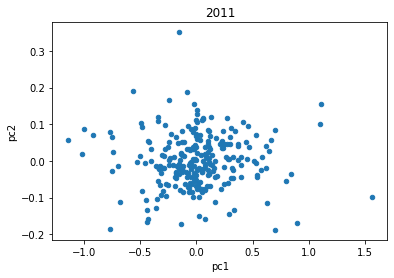

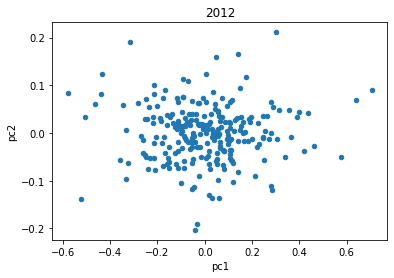

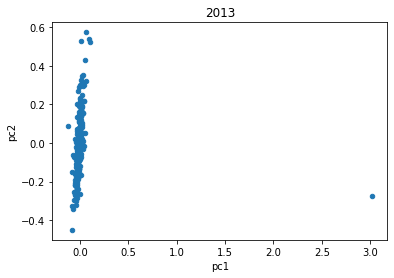

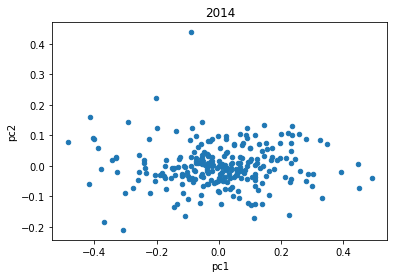

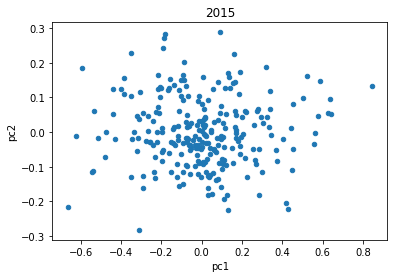

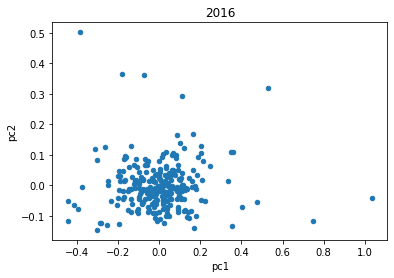

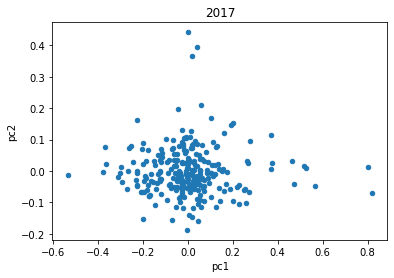

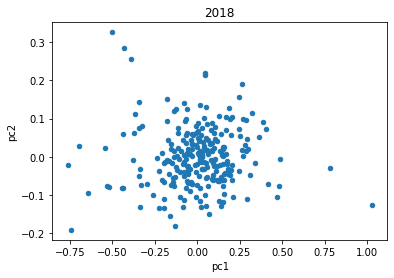

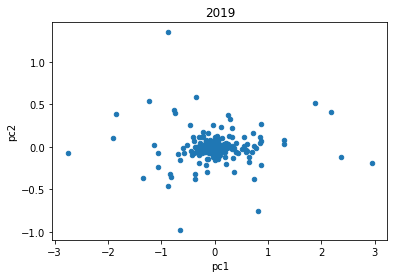

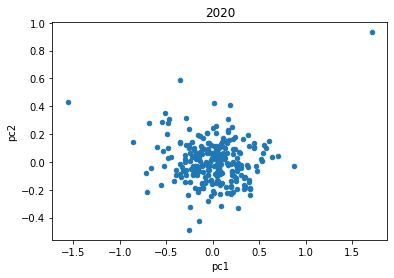

In [145]:
#Ploting the components of PC1 and PC2 for each year (10 graphs)

year_list=list(range(2011, 2021))

for i in year_list:
    start_date=datetime.date(i,6,1) 
    end_date=datetime.date(i+1,6,1)
    data_year=data[start_date:end_date]
    #Performing PCA on 1 year data
    pca_year=PCA(n_components=2)
    components=pca_year.fit_transform(data_year)
    #creating a dataframe with pc1 and pc2 columns
    df_components = pd.DataFrame(
        data=components,
        columns=['pc1', 'pc2']
    )
    
    df_components.plot.scatter(x='pc1', y='pc2')
    plt.title(i)


200 200


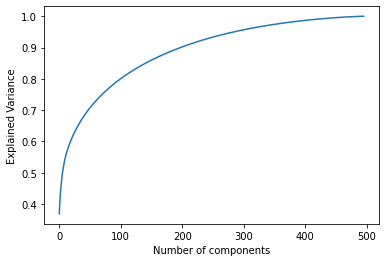

In [41]:
#PCA on the market returns (the first 20 components)

pca = PCA().fit(data.fillna(0))
pc1 = pd.Series(index=data.columns, data=pca.components_[0])
pc1
#print((pca.explained_variance_ratio_*100))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')

#Since Based on the graph 200 components roughly explain the 90% of the data I will choose 200 components

pca_bla = PCA(n_components=200).fit(data.fillna(0))
print(len(pca_bla.components_), len(pca_bla.singular_values_))




